In [216]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint

In [217]:

global flagL, flagR
flagL, flagR = 0, 0
n = 5 # Количсество столбцов

Lgr, Rgr = -4, 4 # Левая/Правая граница функции
Lit, Rit = -3, 0 # Левая/Прпвая границы интегрирования

h = round(abs((Lit-Rit)/n), 3) # Шаг столбца

def Func(x): #Задаём функцию.
    global F, flagL, flagR, n, h
    flagL, flagR = 0, 0

    
    F = x**2
    if F == math.cos(x):
        flagL, flagR  = math.pi/2, math.pi/2
        #return x**8/(8*7*6*5*4*3*2) - x**6/(6*5*4*3*2) + x**4/(4*3*2) - x**2/2 + 1
    elif F == math.sin(x): 
        flagL, flagR = math.pi/2, 0
        #return x**9/(9*8*7*6*5*4*3*2) - x**7/(7*6*5*4*3*2) + x**5/(5*4*3*2) - x**3/(3*2) + x
    elif F == math.cos(2*x): 
        flagL, flagR = math.pi/2, math.pi/2
    elif F == math.sin(2*x): 
        flagL, flagR = math.pi/2, 0

    return F


11.879999999999997


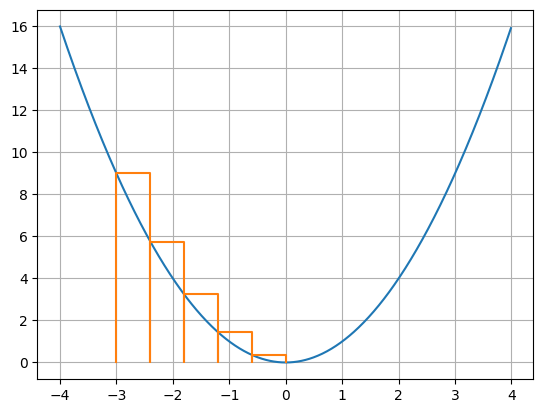

In [218]:

x = np.arange(Lgr, Rgr, 0.01) #Для триганометрии лучше брать маленькие числа
#рисуем нашу функцию
plt.plot(x, list(map(Func, x)))
plt.grid(True)


xN = np.arange(Lit, Rit, h) #Начало и конец промежутка суммы Дарбу

def draw_min(): #Рисуем нижнюю Дарбу
    global h
    k = h
    summa = 0
    xD, yD = [], [] #значения для x и y по Дарбу
    for i in xN:
        if (i >= flagR): #Дарбу справа f - НЕ Триг
            if (i + h) > max(xN):
                h = abs(Rit - i)
            xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
            yD.append(0);yD.append(Func(i));yD.append(Func(i));yD.append(0)
            summa += h*(math.fabs(Func(i)))
        
        elif (i < flagL): #Дарбу слева f - НЕ Триг
            if (i + h) > max(xN):
                h = abs(Rit - i)
            xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
            yD.append(0);yD.append(Func(i+h));yD.append(Func(i+h));yD.append(0)
            summa += h*(math.fabs(Func(i+h)))
        h = k
    print(summa)
    plt.plot(xD, yD)


def draw_max(): #Рисуем верхнюю Дарбу
    global h
    k = h
    summa = 0
    xD, yD = [], [] #значения для x и y по Дарбу

    for i in xN:
        if (i >= flagR): #Дарбу справа f - НЕ Триг
            if (i + h) > max(xN):
                h = abs(Rit - i)
            xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
            yD.append(0);yD.append(Func(i+h));yD.append(Func(i+h));yD.append(0)
            summa += h*(math.fabs(Func(i)))
            
        elif (i < flagL): #Дарбу слева f - НЕ Триг
            if (i + h) > max(xN):
                h = abs(Rit - i)
            xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
            yD.append(0);yD.append(Func(i));yD.append(Func(i));yD.append(0)
            summa += h*(math.fabs(Func(i)))
        else:
            pass
        h = k
    print(summa)
    plt.plot(xD, yD)

#draw_min() # Нарисовать и посчитать нижнюю Дарбу
draw_max() # Нарисовать и посчитать верхнюю Дарбу
plt.show()

8.923803


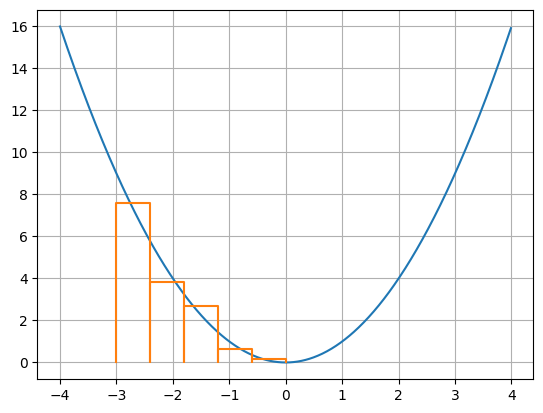

In [219]:
#Всё тоже самое, то теперь делаем задание 1.2 2) Считаем интеграл через случаыйе Эпсилон
plt. close()
x = np.arange(Lgr, Rgr, 0.01) #Для триганометрии лучше брать маленькие числа
#рисуем нашу функцию
plt.plot(x, list(map(Func, x)))
plt.grid(True)

#рисуем столбцы сумм Дарбу
xN = np.arange(Lit, Rit, h) #Начало и конец промежутка суммы Дарбу
h = round(h, 3)
def draw(): #Рисуем верхнюю 
    global h

    summa = 0
    #print(Mn, Bn)
    xD, yD = [], [] #значения для x и y по Дарбу
    for i in xN:
        Eps = randint(0, int(h*1000)) #Случайное отклонение Эпсилон
        Eps = Eps/1000
        # Eps = n/2       #Средняя сумма

        if (i + h) > max(xN):
            h = abs(Rit - i)
            
        xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
        yD.append(0);yD.append(Func(i+Eps));yD.append(Func(i+Eps));yD.append(0)
        summa += h*(math.fabs(Func(i+Eps)))

    print(summa)
    plt.plot(xD, yD)

draw() # Нарисовать и посчитать со случайным оснащением
plt.show()

9.18


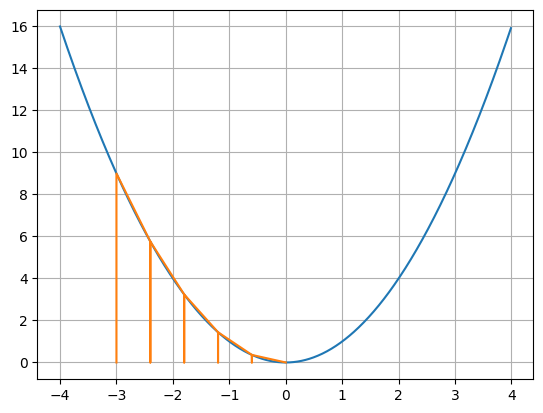

In [220]:
#Всё тоже самое, то теперь делаем задание 1.2 3) Считаем интеграл через метод трапеций
plt. close()
x = np.arange(Lgr, Rgr, 0.01) #Для триганометрии рекомендую брать маленькие числа
#рисуем нашу функцию
plt.plot(x, list(map(Func, x)))
plt.grid(True)

#рисуем столбцы сумм Дарбу
xN = np.arange(Lit, Rit, h) #Начало и конец промежутка суммы Дарбу


def draw(): #Рисуем верхнюю Дарбу
    global h

    summa = 0
    xD, yD = [], [] #значения для x и y по Дарбу
    for i in xN:
        if (i >= flagR): #Дарбу справа f - НЕ Триг
            if (i + h) > max(xN):
                h = abs(Rit - i)

            xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
            yD.append(0);yD.append(Func(i));yD.append(Func(i+h));yD.append(0)
            summa += (h*((float(math.fabs(Func(i))))+float(math.fabs(Func(i+n))))*(1/2))
        elif (i < flagL): #Дарбу слева f - НЕ Триг
            if (i + h) > max(xN):
                h = abs(Rit - i)
            xD.append(i);xD.append(i);xD.append(i+h);xD.append(i+h)
            yD.append(0);yD.append(Func(i));yD.append(Func(i+h));yD.append(0)
            summa += (h*((float(math.fabs(Func(i))))+float(math.fabs(Func(i+h))))*(1/2))
        else:
            pass

    print(summa)
    plt.plot(xD, yD)

draw() # Нарисовать и посчитать со случайным оснащением
plt.show()